# Modelos de clasificación con Keras 

In [62]:
# Importamos la librerias a usar
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


## Acerca del conjunto de datos `MNIST`

La base de datos MNIST , abreviatura de base de datos del Instituto Nacional Modificado de Estándares y Tecnología, es una gran base de datos de dígitos escritos a mano que se usa comúnmente para entrenar varios sistemas de procesamiento de imágenes.

La base de datos MNIST contiene 60.000 imágenes de entrenamiento y 10.000 imágenes de prueba de dígitos escritos por estudiantes de secundaria y empleados de la Oficina del Censo de Estados Unidos. [Dataset source](https://keras.io/api/datasets/mnist/)


In [63]:
#  Leemos la Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Confirmemos la cantidad de imágenes en cada conjunto. Según la documentación del conjunto de datos, deberíamos tener 60000 imágenes en X_train y 10000 imágenes en X_test.

In [64]:

print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (60000, 28, 28)
X_test:  (10000, 28, 28)
y_train:  (60000,)
y_test:  (10000,)


En el conjunto de entrenamiento, hay un total de 60,000 imágenes, cada una con dimensiones de 28 píxeles por 28 píxeles. Por otro lado, las etiquetas (representadas por 'y') corresponden a los valores que identifican cada imagen en el conjunto de datos, es decir, los dígitos que representan, Con la siguiente gráfica, podemos visualizar cómo está compuesto nuestro conjunto de datos con las imágenes y sus respectivas etiquetas. 

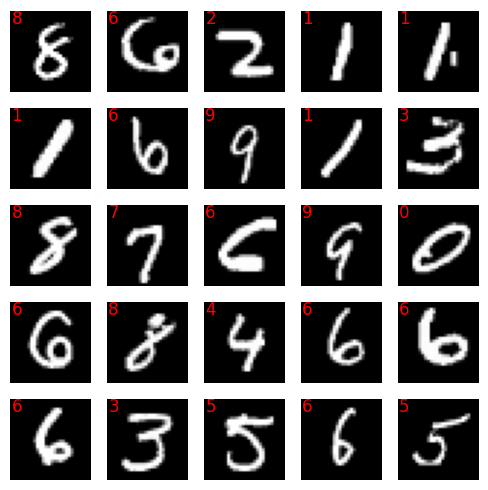

In [65]:
# Seleccionar aleatoriamente 25 dígitos MNIST del conjunto de datos de entrenamiento
indices_aleatorios = np.random.randint(0, X_train.shape[0], size=25)
imagenes_aleatorias = X_train[indices_aleatorios]
etiquetas_aleatorias = y_train[indices_aleatorios]  # Obtener las etiquetas correspondientes

# Crear una figura para mostrar los 25 dígitos MNIST
plt.figure(figsize=(5,5))

# Mostrar cada una de las 25 imágenes en una cuadrícula de 5x5
for i in range(len(indices_aleatorios)):
    plt.subplot(5, 5, i + 1)
    imagen = imagenes_aleatorias[i]
    etiqueta = etiquetas_aleatorias[i]  # Obtener la etiqueta correspondiente
    plt.imshow(imagen, cmap='gray')
    plt.axis('off')
    plt.text(0, -1, str(etiqueta), color='red', fontsize=12, ha='left', va='top')  # Agregar la etiqueta con ajuste vertical

# Mostrar la figura en pantalla
plt.tight_layout()
plt.show()

# Cerrar todas las figuras abiertas
plt.close('all')


Ahora, Se requiere un paso esencial antes de introducir las imágenes en el modelo. Esto se debe a que las redes neuronales convencionales no pueden procesar directamente imágenes en su formato original. Por lo tanto, necesitamos transformar cada imagen en un vector unidimensional aplanado.

In [66]:
# encontrar el tamaño del vector unidimensional
num_pixeles = X_train.shape[1] * X_train.shape[2]  
# aplanar las imágenes de entrenamiento
X_train = X_train.reshape(X_train.shape[0], num_pixeles).astype('float32')  
# aplanar las imágenes de prueba
X_test = X_test.reshape(X_test.shape[0], num_pixeles).astype('float32')  
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)

X_train:  (60000, 784)
X_test:  (10000, 784)


Dado que los valores de píxeles pueden oscilar entre 0 y 255 normalizamos los valores de los píxeles en  el rango de 0 a 1, para esto dividimos cada valor de píxel por 255. 

In [67]:
# Normaliza los valores
X_train = X_train / 255
X_test = X_test / 255

Para poder iniciar la construcción de nuestro modelo debemos convertimos nuestra variable objetivo en categorías

In [68]:
# one hot encode
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_categ = y_test.shape[1]
print(num_categ)

10


### Construir la red neuronal 

In [71]:
# Definimos el modelo
def classification_model():
    # Creamos el modelo
    model = Sequential()
    model.add(Dense(num_pixeles, activation='relu',input_shape=(num_pixeles,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_categ, activation='softmax'))
    # Compilamos el modelo
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

### Entrenar y probar la red 

In [72]:
# Construimos el modelo
model = classification_model()
# Entrenamos el modelo
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)
# Evaluamos el modelo
score = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1875/1875 - 12s - 6ms/step - accuracy: 0.9448 - loss: 0.1866 - val_accuracy: 0.9718 - val_loss: 0.0878
Epoch 2/10
1875/1875 - 10s - 6ms/step - accuracy: 0.9762 - loss: 0.0757 - val_accuracy: 0.9720 - val_loss: 0.0974
Epoch 3/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9826 - loss: 0.0553 - val_accuracy: 0.9791 - val_loss: 0.0699
Epoch 4/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9870 - loss: 0.0402 - val_accuracy: 0.9805 - val_loss: 0.0656
Epoch 5/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9895 - loss: 0.0324 - val_accuracy: 0.9814 - val_loss: 0.0707
Epoch 6/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9913 - loss: 0.0258 - val_accuracy: 0.9807 - val_loss: 0.0730
Epoch 7/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9929 - loss: 0.0213 - val_accuracy: 0.9797 - val_loss: 0.0843
Epoch 8/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9936 - loss: 0.0207 - val_accuracy: 0.9818 - val_loss: 0.0709
Epoch 9/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9945 - loss: 0.0169 - val_accuracy: 

Verificamos la precisión y el error correspondiente.

In [79]:
print('Accuracy: {}% \n Error: {}'.format(score[1], 1 - score[1]))     

Accuracy: 0.9807999730110168% 
 Error: 0.019200026988983154


Estos resultados indican que el modelo tiene un rendimiento bastante bueno en los datos de prueba, con una alta precisión y un bajo error. Esto sugiere que el modelo generaliza bien a datos no vistos y es capaz de realizar predicciones precisas sobre nuevas imágenes.

In [ ]:
# Guadamos el modelo
# model.save('classification_model_keras.h5')
# from keras.models import load_model
# modelo_preentrenado = load_model('classification_model_keras.h5')